# Demo notebook for recreating plots and introducing the NeuralNet (PINN) class

Import classes and functions from twoBodyPINN.py and odeintegrator.py

Classes are NeuralNet and State. Functions are showProgress, showProgress2, trainNetwork, and showTrainingResult

In [1]:
from twoBodyPINN import *

Running on CPU



# Complete training first and show results after

## 1) Elliptical trajectory

Define arguments for training and run in background

In [2]:
args = {"Tmax":8*np.pi,
         "timesteps":514,
         "initial":[1.,0,0,1.2],
         "depth":10,
         "width":43,
         "lr":0.23,
         "weights":[10.27,0.54,10.90,0.00045],
         "epochs":10000,
         "reltol":0,
         "abstol":0,
         "maxtol":1e18,
         "minloss":0,
         "seed":2745}

nn,totalLoss,s,t_plot,flag,validationLoss = trainNetwork(**args)

Show training results

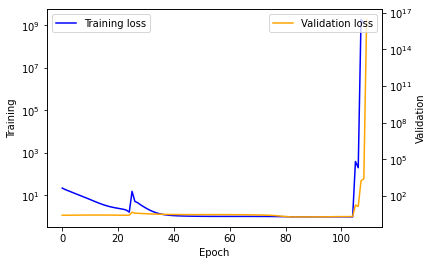

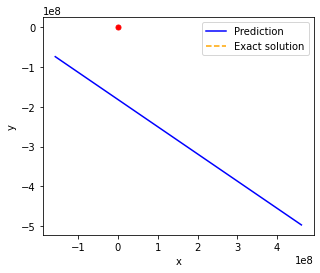

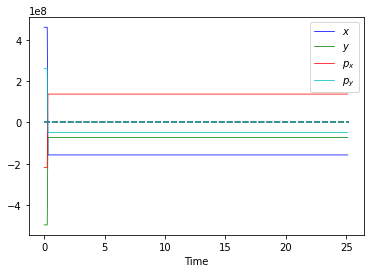

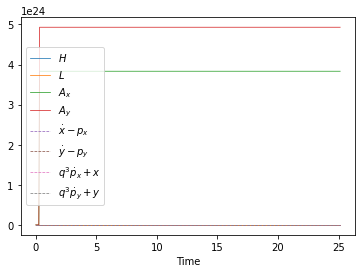

In [3]:
showTrainingResult(nn,t_plot,totalLoss,s,validationLoss)

## 2) Hyperbolic trajectory

In [4]:
args = {"Tmax":1*np.pi,
         "timesteps":514,
         "initial":[-2.,1,-1,1],
         "depth":10,
         "width":43,
         "lr":0.2,
         "weights":[10.27,0.54,10.90,0.00045],
         "epochs":10000,
         "reltol":0,
         "abstol":0,
         "maxtol":1e18,
         "minloss":0,
         "seed":2745}

nn,totalLoss,s,t_plot,flag,validationLoss = trainNetwork(**args)

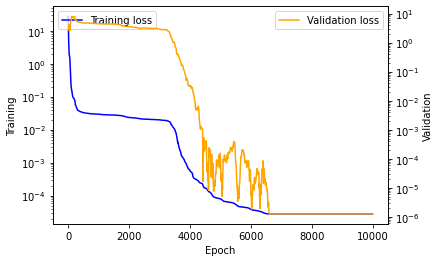

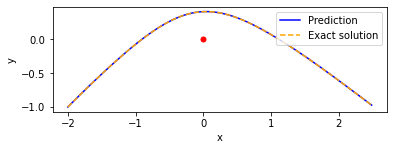

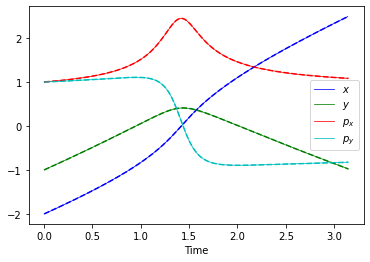

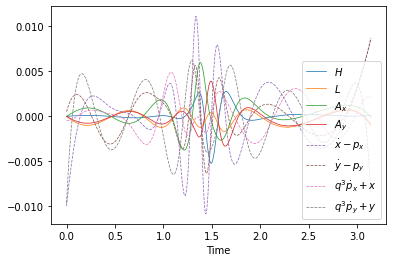

In [5]:
showTrainingResult(nn,t_plot,totalLoss,s,validationLoss)

## 3) Singular trajectory

In [6]:
args = {"Tmax":6.5*np.pi,
         "timesteps":514,
         "initial":[0.87,1.08,0.5,0.625],
         "depth":10,
         "width":43,
         "lr":0.2,
         "weights":[10.27,0.54,10.90,0.00045],
         "epochs":10000,
         "reltol":0,
         "abstol":0,
         "maxtol":1e18,
         "minloss":0,
         "seed":2745}

nn,totalLoss,s,t_plot,flag,validationLoss = trainNetwork(**args)

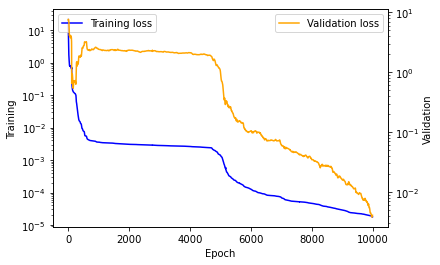

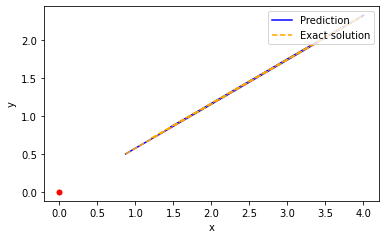

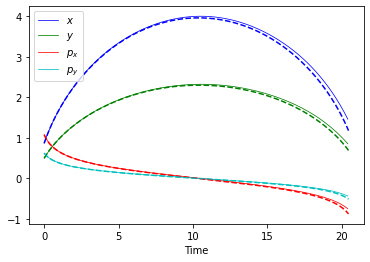

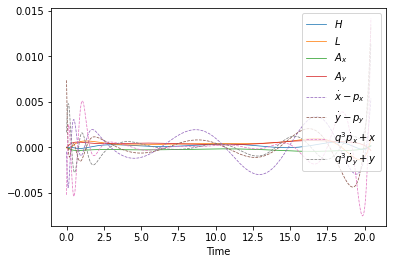

In [7]:
showTrainingResult(nn,t_plot,totalLoss,s,validationLoss)

# Show real time progress
(Small networks to increase framerate)

Open plots window to show animations

In [ ]:
%matplotlib qt5

## 1) Elliptical trajectory
Convergence after 5000 epochs

In [ ]:
args = {"Tmax":4*np.pi, 
         "timesteps":64,
         "initial":[1.,0,0,1.],
         "depth":4,
         "width":16,
         "lr":1,
         "weights":[10.27,0.54,10.90,0.00045],
         "reltol":0,
         "abstol":0,
         "maxtol":1e18,
         "minloss":0,
         "seed":2745}

an,nn,totalLoss,s,t_plot = showProgress(**args)

In [ ]:
showTrainingResult(nn,t_plot,totalLoss,s)

## 2) Hyperbolic trajectory

In [ ]:
args = {"Tmax":1*np.pi,
         "timesteps":64,
         "initial":[-2.,1,-1,1],
         "depth":2,
         "width":16,
         "lr":1,
         "weights":[10.27,0.54,10.90,0.00045],
         "reltol":0,
         "abstol":0,
         "maxtol":1e18,
         "minloss":0,
         "seed":2745}

an,nn,totalLoss,s,t_plot = showProgress2(**args)

## 3) Singular trajectory

In [ ]:
args = {"Tmax":6.5*np.pi,
         "timesteps":64,
         "initial":[0.87,1.08,0.5,0.625],
         "depth":4,
         "width":32,
         "lr":1,
         "weights":[10.27,0.54,10.90,0.00045],
         "reltol":0,
         "abstol":0,
         "maxtol":1e18,
         "minloss":0,
         "seed":2745}

an,nn,totalLoss,s,t_plot = showProgress(**args)

# Demos for the NeuralNet class (PINN)

### Define parameters

In [10]:
import torch
import torch.optim as optim
import torch.nn as nn

Tmax = 2*np.pi
timesteps = 265
depth = 2
width = 16
t_train = torch.linspace(0,Tmax,timesteps,requires_grad=True).reshape(-1,1)
initial = torch.tensor([1.,0,0,1])
seed = 0
lr = 0.20
epochs = 1000
weights = [10,0.5,10,0.0001]

### Initialize network and weights, initialize optimizer

In [11]:
n = NeuralNet(1,4,depth,width,activation_function=nn.Tanh(),initial=initial,seed=seed)
n.xavier()
optimizer = optim.LBFGS(n.parameters(),lr)

### Train network

In [12]:
trainingLoss,validationLoss,flag = n.fit(t_train,epochs,False,weights,optimizer)
print("Training exited by",flag)

Training exited by abstol


### Calculate exact solution

In [13]:
s = State(initial[::2],initial[1::2])
s.evolve(Tmax/401,Tmax);

### Show prediction and exact solution in physical position space

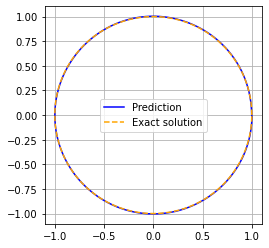

In [14]:
t_predict = torch.linspace(0,Tmax,401).reshape(-1,1)
result = n(t_predict).detach().numpy()
x,px,y,py = result[:,0],result[:,1],result[:,2],result[:,3]

fig,ax = plt.subplots()
ax.set_aspect("equal")
ax.grid()
ax.plot(x,y,'-',color='blue',label="Prediction")
ax.plot(s.x,s.y,'--',color='orange',label="Exact solution")
ax.legend()
plt.show()